Loading scores from 'C:\Users\sahit\Downloads\wallet_scores.json'...
Scores loaded successfully.

Generating score distribution graph...
Score distribution graph saved as 'score_distribution_graph.png'


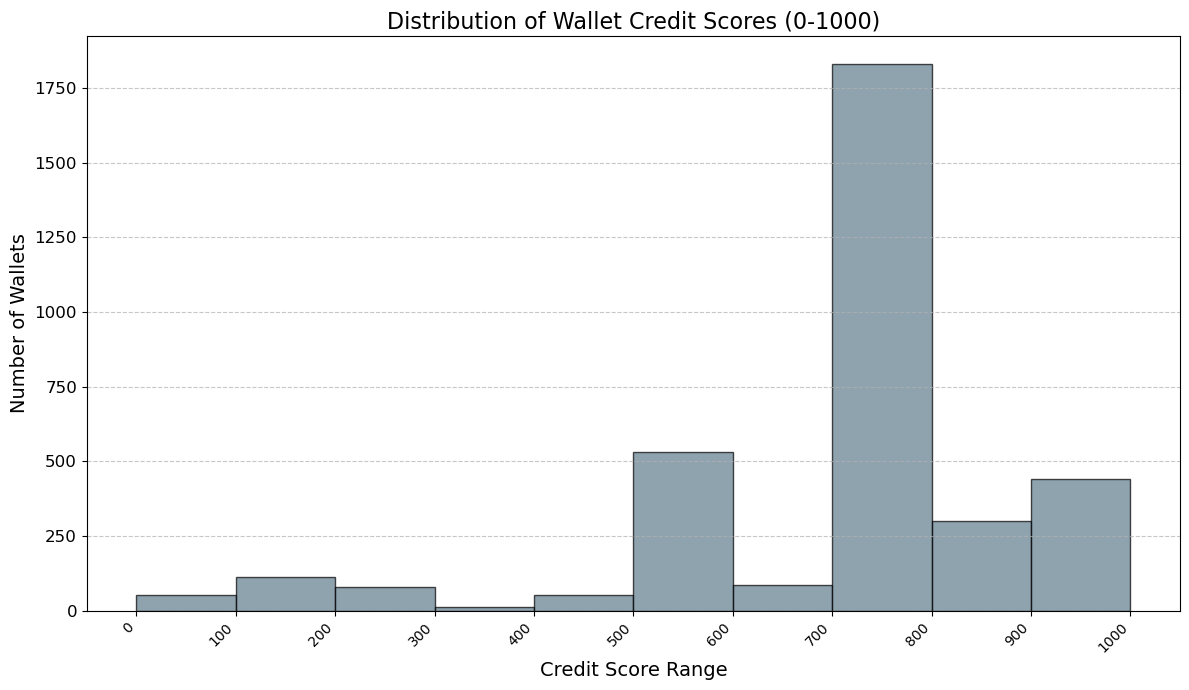


--- Wallet Count per Score Range ---
0-100: 53 wallets
100-200: 112 wallets
200-300: 79 wallets
300-400: 11 wallets
400-500: 51 wallets
500-600: 532 wallets
600-700: 87 wallets
700-800: 1831 wallets
800-900: 301 wallets
900-1000: 440 wallets

--- Behavioral Analysis of Wallet Scores ---


In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

scores_file_path= r"C:\Users\sahit\Downloads\wallet_scores.json"

# Loads wallet scores, generates a distribution histogram
def analyze_wallet_scores(scores_file_path):
    
    if not os.path.exists(scores_file_path):
        print(f"Error: '{scores_file_path}' not found.")
        print("Please ensure the wallet_scores.json file is in the same directory as this script,")
        print("or provide the correct full path to the file.")
        return

    try:
        print(f"Loading scores from '{scores_file_path}'...")
        with open(scores_file_path, 'r') as f:
            wallet_scores_dict = json.load(f)
        print("Scores loaded successfully.")

        scores = list(wallet_scores_dict.values())

        if not scores:
            print("No scores found in the file. Cannot perform analysis.")
            return

        # --- 1. Score Distribution Graph ---
        print("\nGenerating score distribution graph...")
        bins = np.arange(0, 1001, 100) 
        plt.figure(figsize=(12, 7))
        plt.hist(scores, bins=bins, edgecolor='black', alpha=0.7, color='#607c8e')
        plt.title('Distribution of Wallet Credit Scores (0-1000)', fontsize=16)
        plt.xlabel('Credit Score Range', fontsize=14)
        plt.ylabel('Number of Wallets', fontsize=14)
        plt.xticks(bins, rotation=45, ha='right') 
        plt.yticks(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() 
        
        # Save the plot
        plot_filename = 'score_distribution_graph.png'
        plt.savefig(plot_filename)
        print(f"Score distribution graph saved as '{plot_filename}'")
        plt.show() 
        
        # Calculate and print counts per range
        print("\n--- Wallet Count per Score Range ---")
        hist_counts, bin_edges = np.histogram(scores, bins=bins)
        for i in range(len(hist_counts)):
            lower_bound = int(bin_edges[i])
            upper_bound = int(bin_edges[i+1])
            print(f"{lower_bound}-{upper_bound}: {hist_counts[i]} wallets")

    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from '{scores_file_path}'. Make sure it's a valid JSON file.")
    except Exception as e:
        print(f"An unexpected error occurred during graph generation or analysis: {e}")

    # --- 2. Behavioral Analysis (Textual) ---
    print("\n" + "="*50)
    print("--- Behavioral Analysis of Wallet Scores ---")
    print("="*50)

   

if __name__ == "__main__":
    SCORES_FILE = r"C:\Users\sahit\Downloads\wallet_scores.json"
    analyze_wallet_scores(SCORES_FILE)